In [9]:
include("tc_mld.jl")

β_ (generic function with 1 method)

In [35]:
# Test the simple matching function
L = 11
n = 2 * L^2 
p = 0.07
pcmat = toric_code_X_parity_matrix(L)
logicals = toric_code_logical_operators(L)
errors_true = [rand() < p ? 1 : 0 for _ in 1:n]
# Compute syndrome
syndrome = pcmat * errors_true .% 2

# Get a consistent error configuration
matched_errors = simple_match_syndrome(syndrome, L)

# Verify that matched errors produce the same syndrome
matched_syndrome = pcmat * matched_errors .% 2
println("Original and matched syndromes match: ", all(syndrome .== matched_syndrome))


Original and matched syndromes match: true


In [36]:
# Get logical data (which logical operators are applied)
logical_data = (logicals * matched_errors) .% 2

# Create trivial error chain (remove logical component from matched_errors)
trivial_error_chain = (matched_errors .+ (logical_data[1] .* logicals[1,:]) .+ (logical_data[2] .* logicals[2,:])) .% 2

# Generate all four logical equivalence classes
error_chains = [
    trivial_error_chain,                                                    # 00
    (trivial_error_chain .+ logicals[1,:]) .% 2,                          # 10  
    (trivial_error_chain .+ logicals[2,:]) .% 2,                          # 01
    (trivial_error_chain .+ logicals[1,:] .+ logicals[2,:]) .% 2          # 11
]

free_energies = [
    
]
# Verify all have same syndrome as original
println("Syndrome verification:")
for (i, e) in enumerate(error_chains)
    syn = (pcmat * e) .% 2
    matches = all(syn .== syndrome)
    println("Chain $i produces original syndrome: ", matches)
end

Syndrome verification:
Chain 1 produces original syndrome: true
Chain 2 produces original syndrome: true
Chain 3 produces original syndrome: true
Chain 4 produces original syndrome: true


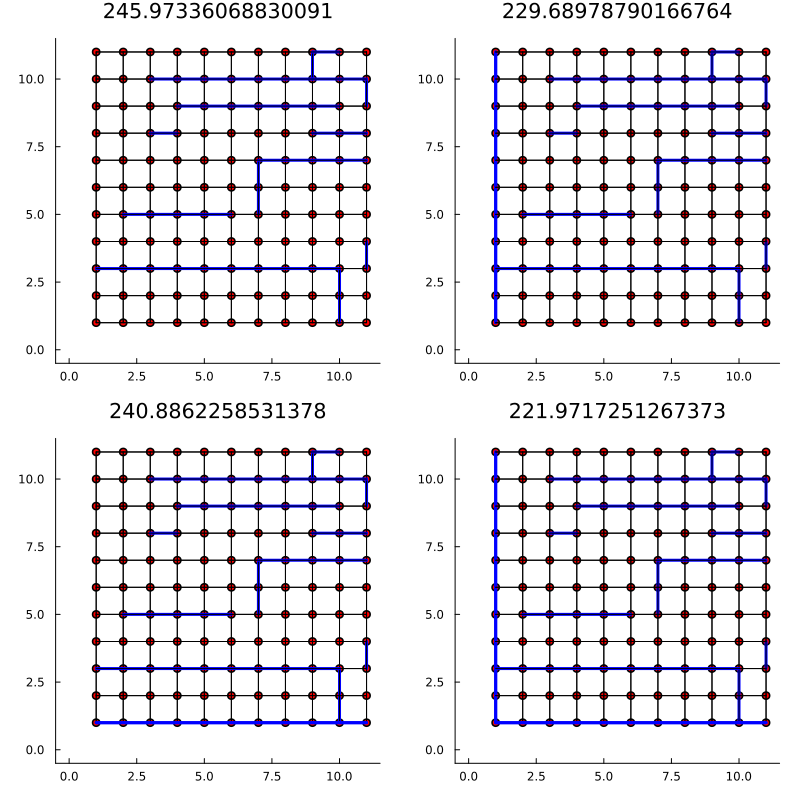

In [37]:
β = β_(p)
# Plot the different error chains
plots_array = []

for (i, error_chain) in enumerate(error_chains)
    plz = plot_error_chain(error_chain, L)
    fe = BP_free_energy(error_chain, L, β)
    plot!(title="$(fe)")
    push!(plots_array, plz)
    push!(free_energies, fe)
end

# Display all plots
plot(plots_array..., layout=(2,2), size=(800,800))

0

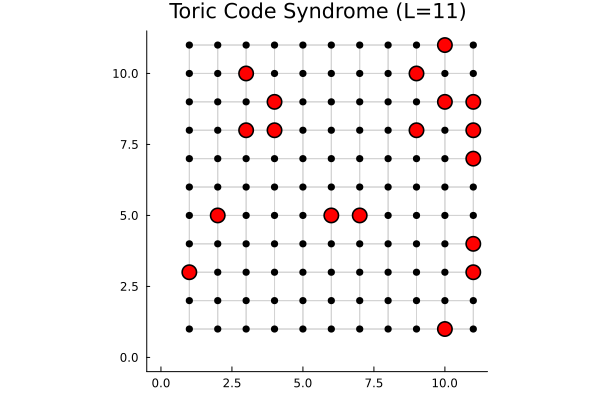

In [40]:
plot_syndrome(syndrome,L)

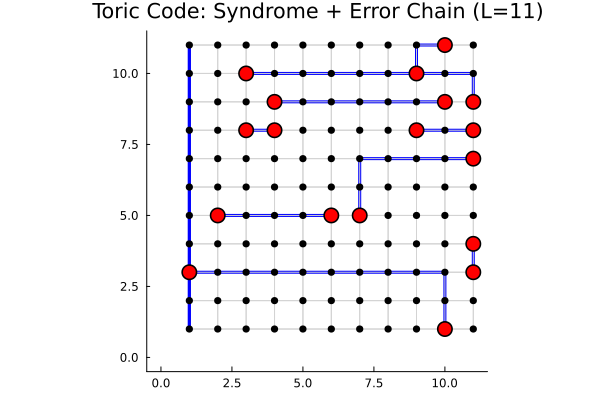

In [41]:
# Plot syndrome and error chain together
plot_syndrome_and_error(syndrome, error_chains[2], L)